해당 과제는 'Brightics Studio'로 시작하는 금융 빅데이터 분석 교재를 참고함

In [24]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [25]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [26]:
cus_cluster = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/연체정보추가.csv', encoding='cp949')

In [27]:
대출건수 =  pd.read_excel('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/호호.xlsx', sheet_name='대출건수',encoding='cp949')
대출금액 =  pd.read_excel('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/호호.xlsx', sheet_name='대출금액',encoding='cp949')


연체건수 =  pd.read_excel('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/호호.xlsx', sheet_name='연체건수',encoding='cp949')
연체금액 =  pd.read_excel('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/호호.xlsx', sheet_name='연체금액',encoding='cp949')



In [28]:
#cus_cluster = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/정상비정상그룹비교_feature_extraction.csv', encoding='cp949')

In [30]:
cus_cluster.columns

Index(['나이', '대출건수_5개월_1', '대출건수_5개월_3', '대출건수_5개월_5', '대출건수_5개월_6',
       '대출건수_5개월_8', '대출건수_5개월_17', '대출건수_5개월_21', '대출건수_5개월_98', '대출금액_5개월_1',
       ...
       '연체금액_5개월_299', '연체금액_5개월_801', '연체금액_5개월_1101', '연체금액_5개월_1201',
       '연체금액_5개월_1301', '연체금액_5개월_9997', '연체금액_5개월_9998', '총연체금액', '총연체건수',
       '성별'],
      dtype='object', length=105)

In [31]:
cus_cluster = cus_cluster[cus_cluster.연체여부==1]

In [32]:
cus_cluster.reset_index(inplace=True)

In [33]:
cus_cluster.drop(columns=['index'],inplace=True)

In [34]:
len(cus_cluster)

3449

In [35]:
cus_cluster.drop(columns=['연체여부'], inplace=True)

In [36]:
나이 = cus_cluster[['나이']]

In [37]:
len(연체금액)

3449

In [39]:
대출건수= 대출건수.div(대출건수.총대출건수, axis=0)

In [40]:
대출금액= 대출금액.div(대출금액.총대출금액, axis=0)
연체건수= 연체건수.div(연체건수.총연체건수, axis=0)
연체금액= 연체금액.div(연체금액.총연체금액, axis=0)

In [41]:
나이.head()

,나이
0,46
1,41
2,62
3,58
4,33


In [42]:
cus_cluster = pd.concat([나이,대출건수,대출금액,연체건수,연체금액],axis=1)

In [43]:
cus_cluster= cus_cluster.fillna(0)

In [44]:
#이상치 처리
def cap_data(df):
    for col in df.columns:
        
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')) :
            percentiles = df[col].quantile([0.01,0.9]).values
            df[col][df[col]>= percentiles[1]] = percentiles[1]
        
        else:
            df[col] = df[col]
    return df

In [46]:
cus_cluster = cap_data(cus_cluster)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [47]:
cus_info2= cus_cluster

In [50]:
corr = cus_cluster.corr(method='pearson')

# Cluster 3 or 4

In [ ]:
cus_cluster.head()

In [51]:
data=cus_cluster

In [52]:
corr = data.corr(method='pearson')

In [53]:
drop50 = [column for column in corr.columns if any((corr[column] >= 0.5))]

In [54]:
data = cus_cluster[drop50]

In [55]:
print(data.columns.to_list())

['나이', '대출건수_5개월_1', '대출건수_5개월_3', '대출건수_5개월_5', '대출건수_5개월_17', '대출건수_5개월_21', '대출건수_5개월_0', '대출건수_5개월_100', '대출건수_5개월_220', '대출건수_5개월_240', '대출금액_5개월_1', '대출금액_5개월_3', '대출금액_5개월_5', '대출금액_5개월_17', '대출금액_5개월_21', '대출금액_5개월_0', '대출금액_5개월_100', '대출금액_5개월_220', '대출금액_5개월_240', '연체건수_5개월_1', '연체건수_5개월_5', '연체건수_5개월_17', '연체건수_5개월_21', '연체건수_5개월_98', '연체건수_5개월_101', '연체건수_5개월_103', '연체건수_5개월_104', '연체건수_5개월_202', '총연체건수', '연체금액_5개월_1', '연체금액_5개월_5', '연체금액_5개월_17', '연체금액_5개월_21', '연체금액_5개월_98', '연체금액_5개월_101', '연체금액_5개월_103', '연체금액_5개월_104', '연체금액_5개월_202', '총연체금액']


In [56]:
data.drop(columns=['연체건수_5개월_1', '연체건수_5개월_5', '연체건수_5개월_17', '연체건수_5개월_21', '연체건수_5개월_98', '연체건수_5개월_101', '연체건수_5개월_103', '연체건수_5개월_104', '연체건수_5개월_202', '연체금액_5개월_1', '연체금액_5개월_5', '연체금액_5개월_17', '연체금액_5개월_21', '연체금액_5개월_98', '연체금액_5개월_101', '연체금액_5개월_103', '연체금액_5개월_104', '연체금액_5개월_202'],
                 inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


대출건수_5개월_1, 대출금액_5개월_1,  3.5.17.21.0.100.220.240.

In [57]:
data.drop(columns=['대출건수_5개월_5', '대출건수_5개월_21','대출건수_5개월_17','대출건수_5개월_0','대출건수_5개월_100','대출건수_5개월_220','대출건수_5개월_240','총연체건수'],inplace=True)

In [58]:
data.drop(columns=['대출금액_5개월_5','대출건수_5개월_3'], inplace=True)

In [59]:
data.drop(columns=['대출건수_5개월_1'],
                 inplace=True)

In [60]:
data.columns

Index(['나이', '대출금액_5개월_1', '대출금액_5개월_3', '대출금액_5개월_17', '대출금액_5개월_21',
       '대출금액_5개월_0', '대출금액_5개월_100', '대출금액_5개월_220', '대출금액_5개월_240', '총연체금액'],
      dtype='object')

In [61]:
cus_cluster = cus_cluster[data.columns]

In [63]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans

In [64]:
cus_cluster.isnull().sum()

나이              0
대출금액_5개월_1      0
대출금액_5개월_3      0
대출금액_5개월_17     0
대출금액_5개월_21     0
대출금액_5개월_0      0
대출금액_5개월_100    0
대출금액_5개월_220    0
대출금액_5개월_240    0
총연체금액           0
dtype: int64

In [65]:
std = StandardScaler()
X_std = std.fit_transform(cus_cluster)

<function matplotlib.pyplot.show(*args, **kw)>

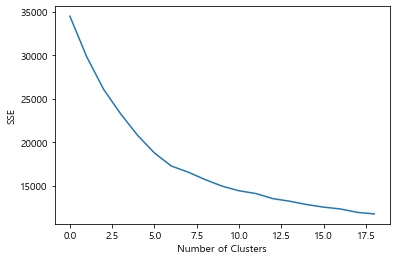

In [66]:
sse=[]
for k in range(1,20):
    
    kmeans = KMeans(n_clusters=k, random_state=777, max_iter=50)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
plt.plot(sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show

# Cluster 4

In [67]:
cus = cus_cluster

In [68]:
cus_info = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/연체정보추가.csv', encoding='cp949')

In [70]:
cus_info = cus_info[cus_info.연체여부==1]

In [71]:
len(cus_info)

3449

In [74]:
model = KMeans(n_clusters=4, random_state=77, 
               max_iter=50).fit(X_std)
label = model.labels_
pd.value_counts(label)

0    1308
1     905
2     863
3     373
dtype: int64

In [77]:
cus['cluster'] = label+1
cus_info['cluster'] = label+1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
from sklearn.manifold import TSNE

In [79]:
Y=TSNE(n_components=2,perplexity=30).fit_transform(cus_cluster)

In [80]:
data1=pd.DataFrame()
data1['y1'] = Y[:,0]
data1['y2'] = Y[:,1]

In [81]:
data1['cluster']=label+1

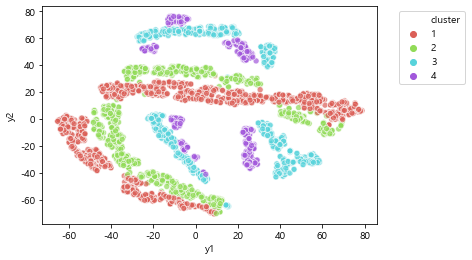

In [82]:
sns.scatterplot(x='y1',
               y='y2',
               hue='cluster',
               palette=sns.color_palette('hls',4),
               legend = 'full',
               data=data1,
               alpha=0.7)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

In [83]:
model = KMeans(n_clusters=4, random_state=77, 
               max_iter=50).fit(X_std)
label = model.labels_
pd.value_counts(label)

0    1308
1     905
2     863
3     373
dtype: int64

1클러스터 사람 젤 많음 : 3247

2 : 11

3 : 33

4 : 158

In [87]:
cus_cluster.groupby('cluster').mean()

,나이,대출금액_5개월_1,대출금액_5개월_3,대출금액_5개월_17,대출금액_5개월_21,대출금액_5개월_0,대출금액_5개월_100,대출금액_5개월_220,대출금액_5개월_240,총연체금액
cluster,,,,,,,,,,
1,44.129205,0.613235,0.203089,0.542505,0.081486,0.169827,0.956008,0.002744,0.067618,0.596330
2,40.554696,0.443545,0.060244,0.167816,1.089701,0.160443,1.108025,0.003015,0.443603,0.501657
3,47.564311,0.367638,0.052312,0.150448,0.065587,1.049414,0.340849,0.002591,0.056762,0.523754
4,49.246649,0.795216,0.410590,0.303532,0.189118,0.175419,0.449766,0.903175,0.076629,0.589812


In [89]:
#cus.groupby(['cluster','나이']).size().to_frame().to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.군집분석/data/나이.csv',encoding='cp949')

In [112]:
cus = cus_info

In [113]:
cus = cap_data(cus)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7:

In [115]:
cus.groupby('cluster').mean()

,나이,대출건수_5개월_1,대출건수_5개월_3,대출건수_5개월_5,대출건수_5개월_6,대출건수_5개월_8,대출건수_5개월_17,대출건수_5개월_21,대출건수_5개월_98,대출금액_5개월_1,대출금액_5개월_3,대출금액_5개월_5,대출금액_5개월_6,대출금액_5개월_8,대출금액_5개월_17,대출금액_5개월_21,대출금액_5개월_98,대출건수_5개월_0,대출건수_5개월_100,대출건수_5개월_150,대출건수_5개월_170,대출건수_5개월_200,대출건수_5개월_210,대출건수_5개월_220,대출건수_5개월_230,대출건수_5개월_240,대출건수_5개월_245,대출건수_5개월_250,대출건수_5개월_270,대출건수_5개월_271,대출건수_5개월_290,대출건수_5개월_500,대출건수_5개월_510,대출건수_5개월_590,대출건수_5개월_700,대출건수_5개월_710,대출금액_5개월_0,대출금액_5개월_100,대출금액_5개월_150,대출금액_5개월_170,대출금액_5개월_200,대출금액_5개월_210,대출금액_5개월_220,대출금액_5개월_230,대출금액_5개월_240,대출금액_5개월_245,대출금액_5개월_250,대출금액_5개월_270,대출금액_5개월_271,대출금액_5개월_290,대출금액_5개월_500,대출금액_5개월_510,대출금액_5개월_590,대출금액_5개월_700,대출금액_5개월_710,개설카드수5,총대출금액,총대출건수,총대출상품수,연체여부,연체건수_5개월_1,연체건수_5개월_3,연체건수_5개월_5,연체건수_5개월_6,연체건수_5개월_8,연체건수_5개월_17,연체건수_5개월_21,연체건수_5개월_98,연체금액_5개월_1,연체금액_5개월_3,연체금액_5개월_5,연체금액_5개월_6,연체금액_5개월_8,연체금액_5개월_17,연체금액_5개월_21,연체금액_5개월_98,연체건수_5개월_101,연체건수_5개월_103,연체건수_5개월_104,연체건수_5개월_199,연체건수_5개월_201,연체건수_5개월_202,연체건수_5개월_299,연체건수_5개월_801,연체건수_5개월_1101,연체건수_5개월_1201,연체건수_5개월_1301,연체건수_5개월_9997,연체건수_5개월_9998,연체금액_5개월_101,연체금액_5개월_103,연체금액_5개월_104,연체금액_5개월_199,연체금액_5개월_201,연체금액_5개월_202,연체금액_5개월_299,연체금액_5개월_801,연체금액_5개월_1101,연체금액_5개월_1201,연체금액_5개월_1301,연체금액_5개월_9997,연체금액_5개월_9998,총연체금액,총연체건수,성별
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,44.129205,9.050459,2.892966,11.859327,0.0,0.0,7.460245,3.333333,0.0,124865.451070,30319.128440,39690.573394,0.0,0.0,83205.840979,15538.470948,0.0,11.652905,14.491590,0.0,0.0,0.0,0.0,0.057339,0.0,2.237003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34695.145260,165097.301223,0.0,0.0,0.0,0.0,1974.541284,0.0,10965.802752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.571101,192865.298165,15.782875,15.782875,1.0,2.067278,0.0,3.253976,0.0,0.0,0.796636,0.378440,2.324159,17092.400612,0.0,10322.637615,0.0,0.0,3580.191131,2146.414373,10266.146789,3.931957,0.497706,3.313456,0.0,0.0,0.883028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51120.596330,2170.252294,8991.146789,0.0,0.0,8028.883792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55526.250765,6.575688,0.321865
2,40.554696,9.151381,1.354696,12.682873,0.0,0.0,3.752486,16.065193,0.0,88318.088398,10053.535912,28504.276243,0.0,0.0,30231.900552,127436.187845,0.0,13.222099,18.448619,0.0,0.0,0.0,0.0,0.069613,0.0,8.464088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27864.839779,177432.585635,0.0,0.0,0.0,0.0,1697.790055,0.0,57096.994475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.208840,144546.298343,18.512707,18.512707,1.0,1.108287,0.0,2.019006,0.0,0.0,0.295028,1.130387,1.627624,8118.563536,0.0,4918.850829,0.0,0.0,1019.723757,6810.331492,8193.513812,3.080663,0.223204,2.026519,0.0,0.0,0.722652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30134.044199,835.270718,4449.405525,0.0,0.0,6426.651934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27680.733702,4.161989,0.360221
3,47.564311,7.849363,1.146002,25.360371,0.0,0.0,3.086906,1.702202,0.0,63571.981460,6963.337196,120509.826188,0.0,0.0,24391.436848,8734.623407,0.0,26.407879,7.436848,0.0,0.0,0.0,0.0,0.033604,0.0,1.803013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121690.278100,58992.943221,0.0,0.0,0.0,0.0,952.027810,0.0,9213.209733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.874855,128676.442642,19.895713,19.895713,1.0,1.619930,0.0,4.955736,0.0,0.0,0.396292,0.152955,1.342990,12920.672074,0.0,20817.937428,0.0,0.0,1846.187717,871.981460,7713.360371,2.333720,1.542294,4.298957,0.0,0.0,0.638470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26051.019699,7482.526072,14794.604867,0.0,0.0,5897.566628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47754.190035,6.380997,0.397451
4,49.246649,14.790885,6.450402,19.788204,0.0,0.0,8.825737,7.538874,0.0,292789.571046,78890.804290,74158.123324,0.0,0.0,109487.426273,62795.683646,0.0,21.882038,20.635389,0.0,0.0,0.0,0.0,8.536193,0.0,3.855228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78339.276139,248512.868633,0.0,0.0,0.0,0.0,309872.922252,0.0,27294.745308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.302949,537099.892761,23.659517,23.659517,1.0,2.050938,0.0,3.699196,0.0,0.0,0.699732,0.546917,2.058981,

# 군집1

In [151]:
clus1 = cus[cus.cluster==1]

In [152]:
clus1 = clus1[clus1.성별==0]

In [153]:
clus1.groupby('cluster').mean()

,나이,대출건수_5개월_1,대출건수_5개월_3,대출건수_5개월_5,대출건수_5개월_6,대출건수_5개월_8,대출건수_5개월_17,대출건수_5개월_21,대출건수_5개월_98,대출금액_5개월_1,대출금액_5개월_3,대출금액_5개월_5,대출금액_5개월_6,대출금액_5개월_8,대출금액_5개월_17,대출금액_5개월_21,대출금액_5개월_98,대출건수_5개월_0,대출건수_5개월_100,대출건수_5개월_150,대출건수_5개월_170,대출건수_5개월_200,대출건수_5개월_210,대출건수_5개월_220,대출건수_5개월_230,대출건수_5개월_240,대출건수_5개월_245,대출건수_5개월_250,대출건수_5개월_270,대출건수_5개월_271,대출건수_5개월_290,대출건수_5개월_500,대출건수_5개월_510,대출건수_5개월_590,대출건수_5개월_700,대출건수_5개월_710,대출금액_5개월_0,대출금액_5개월_100,대출금액_5개월_150,대출금액_5개월_170,대출금액_5개월_200,대출금액_5개월_210,대출금액_5개월_220,대출금액_5개월_230,대출금액_5개월_240,대출금액_5개월_245,대출금액_5개월_250,대출금액_5개월_270,대출금액_5개월_271,대출금액_5개월_290,대출금액_5개월_500,대출금액_5개월_510,대출금액_5개월_590,대출금액_5개월_700,대출금액_5개월_710,개설카드수5,총대출금액,총대출건수,총대출상품수,연체여부,연체건수_5개월_1,연체건수_5개월_3,연체건수_5개월_5,연체건수_5개월_6,연체건수_5개월_8,연체건수_5개월_17,연체건수_5개월_21,연체건수_5개월_98,연체금액_5개월_1,연체금액_5개월_3,연체금액_5개월_5,연체금액_5개월_6,연체금액_5개월_8,연체금액_5개월_17,연체금액_5개월_21,연체금액_5개월_98,연체건수_5개월_101,연체건수_5개월_103,연체건수_5개월_104,연체건수_5개월_199,연체건수_5개월_201,연체건수_5개월_202,연체건수_5개월_299,연체건수_5개월_801,연체건수_5개월_1101,연체건수_5개월_1201,연체건수_5개월_1301,연체건수_5개월_9997,연체건수_5개월_9998,연체금액_5개월_101,연체금액_5개월_103,연체금액_5개월_104,연체금액_5개월_199,연체금액_5개월_201,연체금액_5개월_202,연체금액_5개월_299,연체금액_5개월_801,연체금액_5개월_1101,연체금액_5개월_1201,연체금액_5개월_1301,연체금액_5개월_9997,연체금액_5개월_9998,총연체금액,총연체건수,성별
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,43.937993,9.666291,2.816234,11.043968,0.0,0.0,7.192785,3.201804,0.0,141262.22097,29902.784667,38911.770011,0.0,0.0,83686.561443,15981.172492,0.0,10.990981,14.136415,0.0,0.0,0.0,0.0,0.062007,0.0,2.239008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34585.83991,171436.448703,0.0,0.0,0.0,0.0,2031.003382,0.0,11767.609921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.374295,201748.726043,15.550169,15.550169,1.0,2.266065,0.0,3.225705,0.0,0.0,0.789177,0.373168,2.563698,19714.565953,0.0,10366.133033,0.0,0.0,3594.3292,2171.319053,11443.810598,4.093574,0.473506,3.310034,0.0,0.0,0.962796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56107.46336,2159.853439,9325.524239,0.0,0.0,9019.323563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59988.024803,6.758286,0.0


# 군집 2

In [135]:
clus2 = cus[cus.cluster==2]

In [136]:
clus2 = clus2[clus2.성별==0]

In [137]:
clus2 = clus2[(clus2.나이>=20)&(clus2.나이<30)]

In [138]:
clus2.groupby('cluster').mean()

,나이,대출건수_5개월_1,대출건수_5개월_3,대출건수_5개월_5,대출건수_5개월_6,대출건수_5개월_8,대출건수_5개월_17,대출건수_5개월_21,대출건수_5개월_98,대출금액_5개월_1,대출금액_5개월_3,대출금액_5개월_5,대출금액_5개월_6,대출금액_5개월_8,대출금액_5개월_17,대출금액_5개월_21,대출금액_5개월_98,대출건수_5개월_0,대출건수_5개월_100,대출건수_5개월_150,대출건수_5개월_170,대출건수_5개월_200,대출건수_5개월_210,대출건수_5개월_220,대출건수_5개월_230,대출건수_5개월_240,대출건수_5개월_245,대출건수_5개월_250,대출건수_5개월_270,대출건수_5개월_271,대출건수_5개월_290,대출건수_5개월_500,대출건수_5개월_510,대출건수_5개월_590,대출건수_5개월_700,대출건수_5개월_710,대출금액_5개월_0,대출금액_5개월_100,대출금액_5개월_150,대출금액_5개월_170,대출금액_5개월_200,대출금액_5개월_210,대출금액_5개월_220,대출금액_5개월_230,대출금액_5개월_240,대출금액_5개월_245,대출금액_5개월_250,대출금액_5개월_270,대출금액_5개월_271,대출금액_5개월_290,대출금액_5개월_500,대출금액_5개월_510,대출금액_5개월_590,대출금액_5개월_700,대출금액_5개월_710,개설카드수5,총대출금액,총대출건수,총대출상품수,연체여부,연체건수_5개월_1,연체건수_5개월_3,연체건수_5개월_5,연체건수_5개월_6,연체건수_5개월_8,연체건수_5개월_17,연체건수_5개월_21,연체건수_5개월_98,연체금액_5개월_1,연체금액_5개월_3,연체금액_5개월_5,연체금액_5개월_6,연체금액_5개월_8,연체금액_5개월_17,연체금액_5개월_21,연체금액_5개월_98,연체건수_5개월_101,연체건수_5개월_103,연체건수_5개월_104,연체건수_5개월_199,연체건수_5개월_201,연체건수_5개월_202,연체건수_5개월_299,연체건수_5개월_801,연체건수_5개월_1101,연체건수_5개월_1201,연체건수_5개월_1301,연체건수_5개월_9997,연체건수_5개월_9998,연체금액_5개월_101,연체금액_5개월_103,연체금액_5개월_104,연체금액_5개월_199,연체금액_5개월_201,연체금액_5개월_202,연체금액_5개월_299,연체금액_5개월_801,연체금액_5개월_1101,연체금액_5개월_1201,연체금액_5개월_1301,연체금액_5개월_9997,연체금액_5개월_9998,총연체금액,총연체건수,성별
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,25.884956,9.539823,0.539823,8.044248,0.0,0.0,1.345133,13.681416,0.0,79408.053097,3525.663717,18332.831858,0.0,0.0,8851.858407,103356.814159,0.0,8.415929,15.097345,0.0,0.0,0.0,0.0,0.0,0.0,9.00885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15872.654867,121040.0,0.0,0.0,0.0,0.0,0.0,0.0,63877.433628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.451327,108394.424779,15.876106,15.876106,1.0,0.946903,0.0,1.375221,0.0,0.0,0.141593,1.044248,0.787611,6565.309735,0.0,3058.40708,0.0,0.0,566.902655,6683.80531,3369.557522,2.584071,0.123894,1.292035,0.0,0.0,0.40708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20684.513274,595.39823,2425.274336,0.0,0.0,2937.345133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13682.141593,2.444248,0.0


# 군집3

In [145]:
clus3 = cus[cus.cluster==3]
clus3 = clus3[clus3.성별==1]
clus3 = clus3[(clus3.나이>=60)&(clus3.나이<80)]

In [146]:
clus3.groupby('cluster').mean()

,나이,대출건수_5개월_1,대출건수_5개월_3,대출건수_5개월_5,대출건수_5개월_6,대출건수_5개월_8,대출건수_5개월_17,대출건수_5개월_21,대출건수_5개월_98,대출금액_5개월_1,대출금액_5개월_3,대출금액_5개월_5,대출금액_5개월_6,대출금액_5개월_8,대출금액_5개월_17,대출금액_5개월_21,대출금액_5개월_98,대출건수_5개월_0,대출건수_5개월_100,대출건수_5개월_150,대출건수_5개월_170,대출건수_5개월_200,대출건수_5개월_210,대출건수_5개월_220,대출건수_5개월_230,대출건수_5개월_240,대출건수_5개월_245,대출건수_5개월_250,대출건수_5개월_270,대출건수_5개월_271,대출건수_5개월_290,대출건수_5개월_500,대출건수_5개월_510,대출건수_5개월_590,대출건수_5개월_700,대출건수_5개월_710,대출금액_5개월_0,대출금액_5개월_100,대출금액_5개월_150,대출금액_5개월_170,대출금액_5개월_200,대출금액_5개월_210,대출금액_5개월_220,대출금액_5개월_230,대출금액_5개월_240,대출금액_5개월_245,대출금액_5개월_250,대출금액_5개월_270,대출금액_5개월_271,대출금액_5개월_290,대출금액_5개월_500,대출금액_5개월_510,대출금액_5개월_590,대출금액_5개월_700,대출금액_5개월_710,개설카드수5,총대출금액,총대출건수,총대출상품수,연체여부,연체건수_5개월_1,연체건수_5개월_3,연체건수_5개월_5,연체건수_5개월_6,연체건수_5개월_8,연체건수_5개월_17,연체건수_5개월_21,연체건수_5개월_98,연체금액_5개월_1,연체금액_5개월_3,연체금액_5개월_5,연체금액_5개월_6,연체금액_5개월_8,연체금액_5개월_17,연체금액_5개월_21,연체금액_5개월_98,연체건수_5개월_101,연체건수_5개월_103,연체건수_5개월_104,연체건수_5개월_199,연체건수_5개월_201,연체건수_5개월_202,연체건수_5개월_299,연체건수_5개월_801,연체건수_5개월_1101,연체건수_5개월_1201,연체건수_5개월_1301,연체건수_5개월_9997,연체건수_5개월_9998,연체금액_5개월_101,연체금액_5개월_103,연체금액_5개월_104,연체금액_5개월_199,연체금액_5개월_201,연체금액_5개월_202,연체금액_5개월_299,연체금액_5개월_801,연체금액_5개월_1101,연체금액_5개월_1201,연체금액_5개월_1301,연체금액_5개월_9997,연체금액_5개월_9998,총연체금액,총연체건수,성별
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,60.867647,8.720588,1.617647,26.838235,0.0,0.0,1.926471,0.676471,0.0,56163.235294,12029.705882,111918.382353,0.0,0.0,17910.882353,8701.764706,0.0,27.352941,7.205882,0.0,0.0,0.0,0.0,0.0,0.0,1.397059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111358.823529,59504.411765,0.0,0.0,0.0,0.0,0.0,0.0,8994.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.75,114415.588235,20.485294,20.485294,1.0,1.544118,0.0,4.102941,0.0,0.0,0.441176,0.117647,1.147059,9724.852941,0.0,16909.264706,0.0,0.0,2154.705882,603.235294,7794.117647,1.794118,1.102941,3.808824,0.0,0.0,0.588235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14384.264706,5476.323529,13280.264706,0.0,0.0,6551.470588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38693.058824,5.191176,1.0


# 군집4

In [149]:
clus4 = cus[cus.cluster==4]
clus4 = clus4[clus4.성별==1]
clus4 = clus4[(clus4.나이>=50)&(clus4.나이<60)]

In [150]:
clus4.groupby('cluster').mean()

,나이,대출건수_5개월_1,대출건수_5개월_3,대출건수_5개월_5,대출건수_5개월_6,대출건수_5개월_8,대출건수_5개월_17,대출건수_5개월_21,대출건수_5개월_98,대출금액_5개월_1,대출금액_5개월_3,대출금액_5개월_5,대출금액_5개월_6,대출금액_5개월_8,대출금액_5개월_17,대출금액_5개월_21,대출금액_5개월_98,대출건수_5개월_0,대출건수_5개월_100,대출건수_5개월_150,대출건수_5개월_170,대출건수_5개월_200,대출건수_5개월_210,대출건수_5개월_220,대출건수_5개월_230,대출건수_5개월_240,대출건수_5개월_245,대출건수_5개월_250,대출건수_5개월_270,대출건수_5개월_271,대출건수_5개월_290,대출건수_5개월_500,대출건수_5개월_510,대출건수_5개월_590,대출건수_5개월_700,대출건수_5개월_710,대출금액_5개월_0,대출금액_5개월_100,대출금액_5개월_150,대출금액_5개월_170,대출금액_5개월_200,대출금액_5개월_210,대출금액_5개월_220,대출금액_5개월_230,대출금액_5개월_240,대출금액_5개월_245,대출금액_5개월_250,대출금액_5개월_270,대출금액_5개월_271,대출금액_5개월_290,대출금액_5개월_500,대출금액_5개월_510,대출금액_5개월_590,대출금액_5개월_700,대출금액_5개월_710,개설카드수5,총대출금액,총대출건수,총대출상품수,연체여부,연체건수_5개월_1,연체건수_5개월_3,연체건수_5개월_5,연체건수_5개월_6,연체건수_5개월_8,연체건수_5개월_17,연체건수_5개월_21,연체건수_5개월_98,연체금액_5개월_1,연체금액_5개월_3,연체금액_5개월_5,연체금액_5개월_6,연체금액_5개월_8,연체금액_5개월_17,연체금액_5개월_21,연체금액_5개월_98,연체건수_5개월_101,연체건수_5개월_103,연체건수_5개월_104,연체건수_5개월_199,연체건수_5개월_201,연체건수_5개월_202,연체건수_5개월_299,연체건수_5개월_801,연체건수_5개월_1101,연체건수_5개월_1201,연체건수_5개월_1301,연체건수_5개월_9997,연체건수_5개월_9998,연체금액_5개월_101,연체금액_5개월_103,연체금액_5개월_104,연체금액_5개월_199,연체금액_5개월_201,연체금액_5개월_202,연체금액_5개월_299,연체금액_5개월_801,연체금액_5개월_1101,연체금액_5개월_1201,연체금액_5개월_1301,연체금액_5개월_9997,연체금액_5개월_9998,총연체금액,총연체건수,성별
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,54.464286,11.428571,7.892857,17.642857,0.0,0.0,9.339286,8.071429,0.0,211789.285714,95441.071429,50875.892857,0.0,0.0,102589.285714,73558.928571,0.0,19.178571,20.107143,0.0,0.0,0.0,0.0,8.339286,0.0,4.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53121.071429,210755.892857,0.0,0.0,0.0,0.0,299150.0,0.0,29801.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.071429,492149.642857,21.839286,21.839286,1.0,1.642857,0.0,3.9,0.0,0.0,0.714286,0.553571,1.142857,13252.678571,0.0,11881.964286,0.0,0.0,3040.0,3717.142857,5085.714286,3.696429,0.607143,3.625,0.0,0.0,0.410714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61210.714286,2705.0,9636.714286,0.0,0.0,3853.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61324.357143,6.271429,1.0
